In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 88s 8us/step


Visualize the dataset

Target labels:  [4 2 6 5 8 7 4 8 7 7]


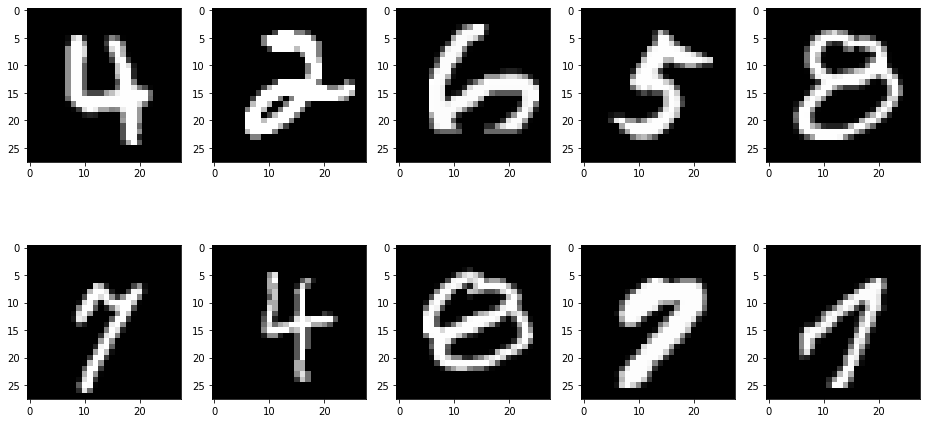

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [12]:
#model=Sequential()

#model.add(Flatten(input_shape=(28,28)))

#model.add(Dense(64,activation='relu'))
#model.add(Dense(64,input_dim=64,activation='relu'))
#model.add(Dense(32,input_dim=64,activation='relu'))
#model.add(Dense(10,input_dim=32,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l1_l2

# Create a Sequential model
model = Sequential()

# Flatten the 28x28 input images to a 1D array
model.add(Flatten(input_shape=(28, 28)))

# Add a fully connected layer with L1 and L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

# Add another fully connected layer with L1 and L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

# Add another fully connected layer with L1 and L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

# Add the output layer with 10 units (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile()

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [14]:
#train_info = model.fit(new_train_data , new_train_target , epochs = 10)


# Load and preprocess your new training data
#new_train_data, new_train_target = load_and_preprocess_data(new_data_path)

# Retrain the model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define a learning rate schedule function
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

# Create callbacks for early stopping and learning rate scheduling
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Assuming you have already defined and compiled your model

# Load and preprocess the new training data
#new_train_data, new_train_target = load_and_preprocess_data(new_data_path)

# Retrain the model
history = model.fit(
    new_train_data,
    new_train_target,
    epochs=20,  # You can adjust the number of epochs
    batch_size=64,  # You can adjust the batch size
    validation_split=0.2,  # If you have validation data
    callbacks=[early_stopping, lr_scheduler]  # Include callbacks
)


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 1.6250 - val_loss: 0.2811 - lr: 0.0010
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2816 - val_loss: 0.2815 - lr: 0.0010
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2816 - val_loss: 0.2816 - lr: 0.0010
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2816 - val_loss: 0.2816 - lr: 0.0010
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2816 - val_loss: 0.2816 - lr: 0.0010
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1408 - val_loss: 0.2099 - lr: 5.0000e-04
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1408 - val_loss: 0.1748 - lr: 5.0000e-04
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1408 - val_loss: 0.1575 - lr: 5.0000e-04
Epoch 9/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1408 - v

Plot the loss and accuracy graphs

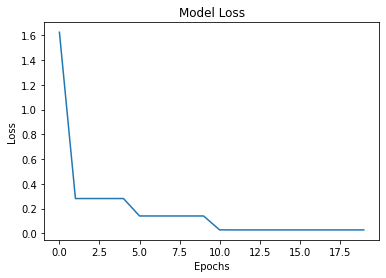

In [16]:
#plt.plot(train_info.history['loss'])
#plt.xlabel('epochs')
#plt.ylabel('loss')
#plt.title('Model loss')
#plt.show()

import matplotlib.pyplot as plt

# Assuming you have already trained your model and stored the training history in the 'history' variable

# Plot the training loss
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()


In [21]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and stored the training history in the 'history' variable

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


KeyError: 'accuracy'

Test the performance of Model

In [23]:
#loss, acc = model.evaluate(new_test_data , new_test_target)
#print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')
# Evaluate the model on the test dataset
loss = model.evaluate(new_test_data, new_test_target, verbose=0)

# Calculate the accuracy manually
accuracy = 1 - loss

# Print the evaluation results
print(f'Loss of the Test dataset is: {loss:.4f}')
print(f'Accuracy of the Test dataset is: {accuracy:.4f}')


Loss of the Test dataset is: 0.0291
Accuracy of the Test dataset is: 0.9709


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

313/313 [==============================] - 1s 1ms/step


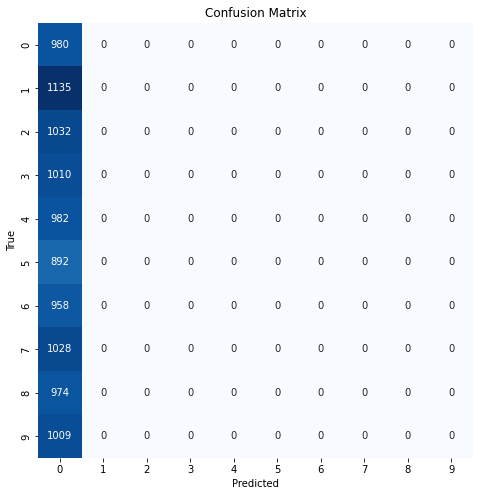

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your model and have test data
# model and new_test_data should be defined

# Predict class probabilities for the test data
predicted_probs = model.predict(new_test_data)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predicted_probs, axis=1)

# Convert one-hot encoded test labels back to integers
true_labels = np.argmax(new_test_target, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

